# Project Benson

Kenny Leung - kenleung11@gmail.com

Part 1/1 - Code for Project Benson

This notebook documents the process of reading NYC MTA turnstile data, cleaning and manipulating code and performing exploratory data analysis.

Each row in an MTA data file contains the following items:

C/A      = Control Area (a block of turnstiles); <br>
UNIT     = Remote Unit, unique ID for a subway station; <br>
SCP      = Number designating a single turnstile; <br>
STATION  = Station name; <br>
LINENAME = Concatenation of names of lines going through station (e.g. NQR456, BD,...); <br>
DIVISION = A throwback to the time when there were three separate subway systems: <br>
          -   IRT = Interborough Rapid Transit;
          -   BMT = Brooklyn-Manhattan Transit;
          -   IND = Independent Subway;
           In addition, there are also the following divisions: <br>
          -   PTH = Port Authority Trans-Hudson (PATH);
          -   RIT = Roosevelt Island Tram;
          -   SRT = Staten Island Rapid Transit;
DATE     = Date on which data were collected; <br>
TIME     = Time of collection (every four hours); <br>
DESC     = This is either "REGULAR" or "RECOVR AUD" <br>
ENTRIES  = State of entries counter at turnstile at given date and time; <br>
EXITS    = State of exits counter at turnstile at given date and time. <br>
Note: Entries and exits counters get reset regularly, but not quite predictably. <br>

In [2]:
#import libraries
import csv
import numpy as np
import pandas as pd
from collections import defaultdict
import dateutil.parser
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# display values to three decimal points for pandas dataframe
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# set default settings for seaborn plots
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.set(font_scale=1.5)

# Reading and creating dataframe from url

In [6]:
# set list of MTA data urls
lst= ['http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170909.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170902.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170826.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170819.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170812.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170805.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170729.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170722.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170715.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170708.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170701.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170325.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170318.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170311.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170304.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170225.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170218.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170211.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170204.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170128.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170121.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170114.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170107.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161231.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161224.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161217.txt', 
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161210.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161203.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161126.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161119.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161112.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161105.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161029.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161022.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161015.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161008.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_161001.txt',
'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160924.txt'
]

from time import sleep

annual = pd.DataFrame() # create empty dataframe
counter = 1
for i in lst: 
    if counter <100:
        print (i)
        while True:
            try:
                frame = pd.read_csv(i) # read text from url
                sleep(1)
                break
            except:
                print (i, "time out!")
                counter = counter + 1
                pass 

    annual = pd.concat([annual, frame]) # concat to one dataframe
    print (len(annual))

http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt
198419
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170909.txt
396140
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170902.txt
595901
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170826.txt
791899
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170819.txt
992451
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170812.txt
1188143
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170805.txt
1390100
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170729.txt
1590212
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170722.txt
1787646
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170715.txt
1984330
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170708.txt
2179896
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170701.txt
2377317
http://web.mta.info/developers/data/nyct/turn

In [7]:
# save to csv
annual.to_csv('turnstile_raw.csv')

# Cleaning the data

In [8]:
# read in csv file
df1 = pd.read_csv('turnstile_raw.csv',index_col=0)

/Users/kennyleung/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
# create a new column called station_line
df1['STATION_LINE'] = df1['STATION']+' '+df1['LINENAME']

In [11]:
# read in boroughs excel file, which has a column showing whether a station is in Queens, Brooklyn, or other
# merge the dataframes by station_line
dfb = pd.read_excel('boroughs.xlsx')
df = df1.merge(dfb, on='STATION_LINE', how='left')

In [12]:
# filter out all stations that are not located in Queens or Brooklyn
df = df[(df['Borough'] == "Brooklyn")|(df['Borough'] =='Queens')]

In [13]:
#clean column names
df = df.rename(columns=lambda x: x.strip())

In [14]:
# create a datetime object using datetime
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [15]:
# create a column called keys
df['KEYS'] = df['C/A']+', '+df['UNIT']+', '+df['SCP']+', '+df['STATION_x']

In [16]:
(df # group dataframe and count to see if there are duplicate entries
 .groupby(["C/A", "UNIT", "SCP", "STATION_x", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION_x,DATE_TIME,ENTRIES
87929,B017,R262,00-00-02,BEVERLEY ROAD,2016-10-08 08:00:00,2
464134,C020,R233,00-00-01,53 ST,2017-09-03 12:00:00,2
3093874,R518,R261,00-00-00,40 ST LOWERY ST,2017-03-13 12:00:00,2
2047020,N329,R201,00-00-00,WOODHAVEN BLVD,2017-04-28 05:00:00,2
3154796,R523,R147,00-00-04,61 ST WOODSIDE,2016-12-22 20:00:00,2


In [17]:
# drop duplicate entries
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION_x", "DATE_TIME"], inplace=True)

In [18]:
# obtain delta entries and exits by subtracting value from the row above
df['DELTA_ENTRIES'] = df['ENTRIES'].diff().shift(-1)
df['DELTA_EXITS'] = df['EXITS'].diff().shift(-1)

In [19]:
# take out entries where the "key" is different from the "key" of the row above
df = df[df['KEYS'] == df['KEYS'].shift(-1)]

In [20]:
# only look at delta entries and exits between 0 and 5000
df_cleaned = df[(df['DELTA_ENTRIES'] > 0) & (df['DELTA_EXITS'] > 0) & (df['DELTA_ENTRIES'] < 5000) & (df['DELTA_EXITS'] < 5000)]

In [32]:
# create new columns and saving the cleaned data
df_cleaned.loc[:,'STATION_BOROUGH'] = df_cleaned.loc[:,'STATION_x'].str.cat(df_cleaned.loc[:,'Borough'], sep='-')
df_cleaned.loc[:,'HOUR'] = df_cleaned.loc[:,'DATE_TIME'].dt.hour
df_cleaned.loc[:,'ENTRIES_AND_EXITS'] = df_cleaned.loc[:,'DELTA_ENTRIES'] + df_cleaned.loc[:,'DELTA_EXITS']

# save to csv
df_cleaned.to_csv('turnstile_cleaned.csv')

/Users/kennyleung/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Analyzing Entries between 4AM to Noon

In [33]:
# create new dataframe for entries between 4AM and noon
df_morning = df_cleaned[(4 <= df_cleaned['HOUR']) & (df_cleaned['HOUR'] <= 12)]

In [35]:
# groupby stations and sum all columns
df_morning_grouped = df_morning.groupby('STATION_BOROUGH') \
.sum() \
.drop(['ENTRIES','EXITS','DELTA_EXITS','HOUR','ENTRIES_AND_EXITS'], axis=1) \
.reset_index()

In [36]:
# look at top 10 stations with most entries in the morning
df_morning_grouped_top = df_morning_grouped \
.sort_values('DELTA_ENTRIES',ascending=False) \
.head(10)

In [43]:
df_morning_grouped_top.head(5)

,STATION_BOROUGH,DELTA_ENTRIES
113,FLUSHING-MAIN-Queens,12132762.000
139,JKSN HT-ROOSVLT-Queens,10264616.000
92,CHURCH AV-Brooklyn,8063259.000
135,JAMAICA CENTER-Queens,7667749.000
53,ATL AV-BARCLAY-Brooklyn,6981073.000


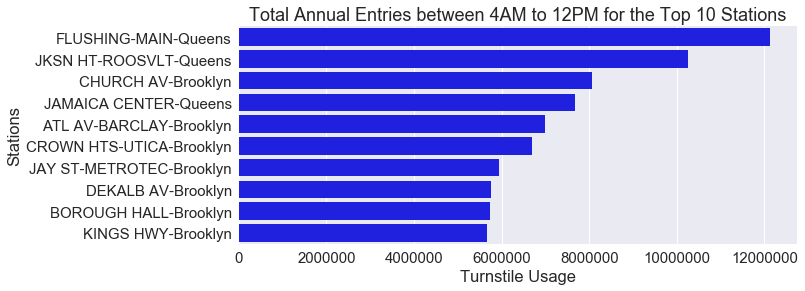

In [38]:
# plot results
plt.figure(figsize=(10,4))
sns.barplot(x='DELTA_ENTRIES',y='STATION_BOROUGH',data=df_morning_grouped_top,color='blue')
plt.title('Total Annual Entries between 4AM to 12PM for the Top 10 Stations') 
plt.xlabel('Turnstile Usage')
plt.ylabel('Stations')

plt.ticklabel_format(style='plain', axis='x')

# Analyzing Exits between 4PM to 8PM

In [39]:
# create new dataframe for exits between 4PM and 8PM
df_evening = df_cleaned[(16 <= df_cleaned['HOUR']) & (df_cleaned['HOUR'] <= 20)]

In [40]:
# groupby stations and sum all columns
df_evening_grouped = df_evening \
.groupby('STATION_BOROUGH').sum() \
.drop(['ENTRIES','EXITS','DELTA_ENTRIES','HOUR','ENTRIES_AND_EXITS'], axis=1) \
.reset_index()

In [41]:
# look at top 10 stations with most exits in the evening
df_evening_grouped_top = df_evening_grouped \
.sort_values('DELTA_EXITS',ascending=False) \
.head(10)

In [44]:
df_evening_grouped_top.head(5)

,STATION_BOROUGH,DELTA_EXITS
113,FLUSHING-MAIN-Queens,6295990.000
139,JKSN HT-ROOSVLT-Queens,5292420.000
53,ATL AV-BARCLAY-Brooklyn,4925820.000
75,BEDFORD AV-Brooklyn,4595995.000
92,CHURCH AV-Brooklyn,3630765.000


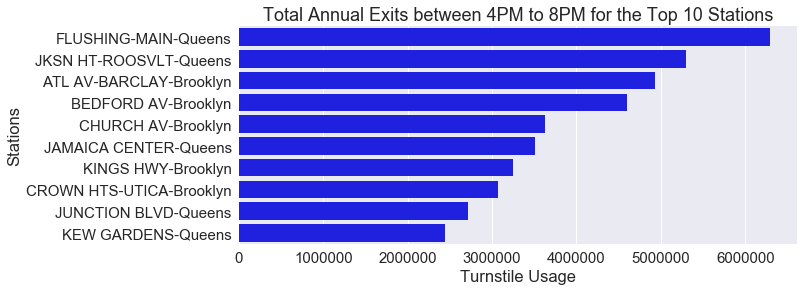

In [45]:
# plot results
plt.figure(figsize=(10,4))
sns.barplot(x='DELTA_EXITS',y='STATION_BOROUGH',data=df_evening_grouped_top,color='blue')
plt.title('Total Annual Exits between 4PM to 8PM for the Top 10 Stations') 
plt.xlabel('Turnstile Usage')
plt.ylabel('Stations')

plt.ticklabel_format(style='plain', axis='x')

# Analyzing Entries and Exits between 4AM to 8PM

In [46]:
# create new dataframe for data between 4AM and 8PM
df_timed = df_cleaned[(4 <= df_cleaned['HOUR']) & (df_cleaned['HOUR'] <= 20)]

In [47]:
# groupby station and sum all columns
df_timed_grouped = df_timed \
.groupby('STATION_BOROUGH').sum() \
.drop(['ENTRIES','EXITS','DELTA_ENTRIES','DELTA_EXITS','HOUR'], axis=1) \
.reset_index()

In [48]:
# look at top 10 stations with most entries and exits in the timeframe
df_timed_top = df_timed_grouped \
.sort_values('ENTRIES_AND_EXITS',ascending=False) \
.head(10)

In [49]:
df_timed_top.head()

,STATION_BOROUGH,ENTRIES_AND_EXITS
113,FLUSHING-MAIN-Queens,31941364.000
139,JKSN HT-ROOSVLT-Queens,25997389.000
53,ATL AV-BARCLAY-Brooklyn,25297161.000
137,JAY ST-METROTEC-Brooklyn,20152276.000
135,JAMAICA CENTER-Queens,18846896.000


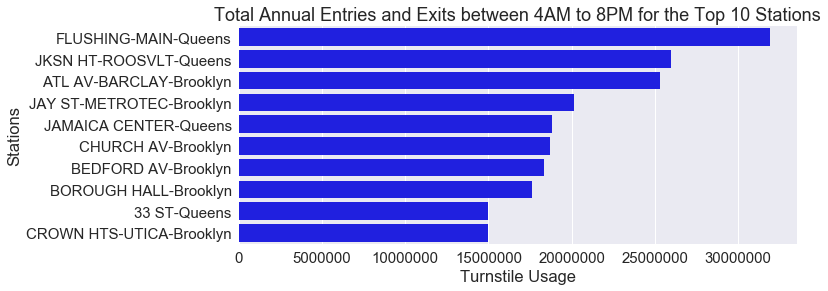

In [50]:
# plot the results
plt.figure(figsize=(10,4))
sns.barplot(x='ENTRIES_AND_EXITS',y='STATION_BOROUGH',data=df_timed_top,color='blue')
plt.title('Total Annual Entries and Exits between 4AM to 8PM for the Top 10 Stations') 
plt.xlabel('Turnstile Usage')
plt.ylabel('Stations')

plt.ticklabel_format(style='plain', axis='x')

# Analyzing Total Entries and Exits Annually

In [51]:
# create new dataframe for total annual data
df_grouped = df_cleaned \
.groupby('STATION_BOROUGH').sum() \
.drop(['ENTRIES','EXITS','DELTA_ENTRIES','DELTA_EXITS','HOUR'], axis=1) \
.reset_index()

In [53]:
# look at top 20 stations with most entries and exits
df_totals = df_grouped \
.sort_values('ENTRIES_AND_EXITS',ascending=False).head(20)

In [54]:
df_totals.head()

,STATION_BOROUGH,ENTRIES_AND_EXITS
113,FLUSHING-MAIN-Queens,33494516.000
139,JKSN HT-ROOSVLT-Queens,27795352.000
53,ATL AV-BARCLAY-Brooklyn,26239370.000
137,JAY ST-METROTEC-Brooklyn,20692098.000
135,JAMAICA CENTER-Queens,20259842.000


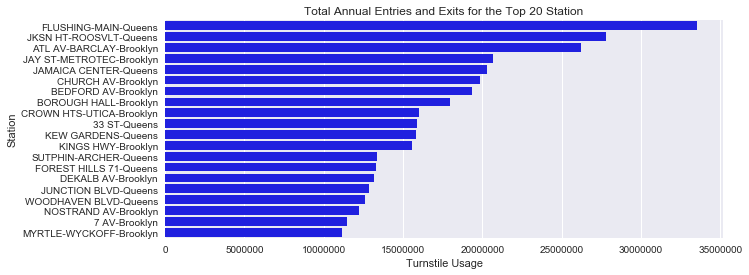

In [55]:
# plot results
plt.figure(figsize=(10,4))
sns.set(font_scale=1.0)
sns.barplot(x='ENTRIES_AND_EXITS',y='STATION_BOROUGH',data=df_totals,color='blue')
plt.title('Total Annual Entries and Exits for the Top 20 Station') 
plt.xlabel('Turnstile Usage')
plt.ylabel('Station')

plt.ticklabel_format(style='plain', axis='x')